In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df = pd.read_excel('D://data_analysis/EDA_super_market_sales/data_after_cleaning.xls')

In [39]:
df.head()

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,...,category,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,20.9568,110.0232
1,1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,73.1940,170.7860
2,2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,3.4357,3.8743
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-76.6062,268.1217
4,4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,1.2582,9.9258


## converting order_date, ship_date to a datetime

In [40]:
df["order_daterder"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

In [41]:
# insert the time between order and ship dates
df.insert(6, "duration", df["ship_date"] - df["order_date"])

In [42]:
df.head()

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,duration,customer_id,customer_name,segment,...,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost,order_daterder
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,3 days,CG-12520,Claire Gute,Consumer,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,20.9568,110.0232,2016-11-08
1,1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,3 days,CG-12520,Claire Gute,Consumer,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,73.1940,170.7860,2016-11-08
2,2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,4 days,DV-13045,Darrin Van Huff,Corporate,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,3.4357,3.8743,2016-06-12
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,7 days,SO-20335,Sean O'Donnell,Consumer,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-76.6062,268.1217,2015-10-11
4,4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,7 days,SO-20335,Sean O'Donnell,Consumer,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,1.2582,9.9258,2015-10-11


In [43]:
# Highlighting the shipment period
shipment_periods = df.groupby("duration")

In [44]:
# Counts of each duration
shipment_periods.duration.count()

duration
0 days     519
1 days     369
2 days    1334
3 days    1005
4 days    2774
5 days    2169
6 days    1203
7 days     621
Name: duration, dtype: int64

In [45]:
# Minimum duration
df["duration"].min()

Timedelta('0 days 00:00:00')

In [46]:
# Maximum duration
df["duration"].max()

Timedelta('7 days 00:00:00')

In [47]:
# Plotting durations
durations = shipment_periods.count().index
duration_counts = shipment_periods["duration"].count().values

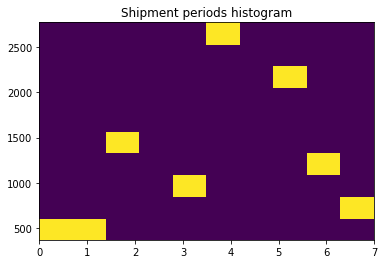

In [48]:
plt.hist2d(durations.days, duration_counts)
plt.title("Shipment periods histogram")
plt.show()

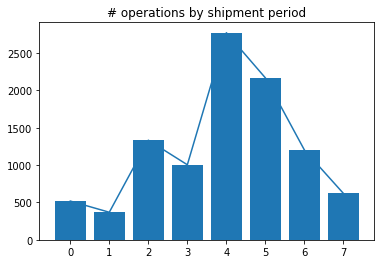

In [49]:
ax = plt.bar(durations.days, duration_counts)
plt.title("# operations by shipment period")
plt.plot(duration_counts)
plt.show()

# Shipment duration notes
### Minimum duration = 0 (the same day)
### Maximum duration = 7 days
### mode is 4 days with 2774 transactions

# Studying the order_dates for trends

In [50]:
by_date = df.groupby("order_date")

In [51]:
total_sales_per_day = by_date.sales.sum()
mean_sales_line = df["sales"].mean()
print(mean_sales_line)

229.8580008304938


Text(0.5, 1.0, 'Sales over time')

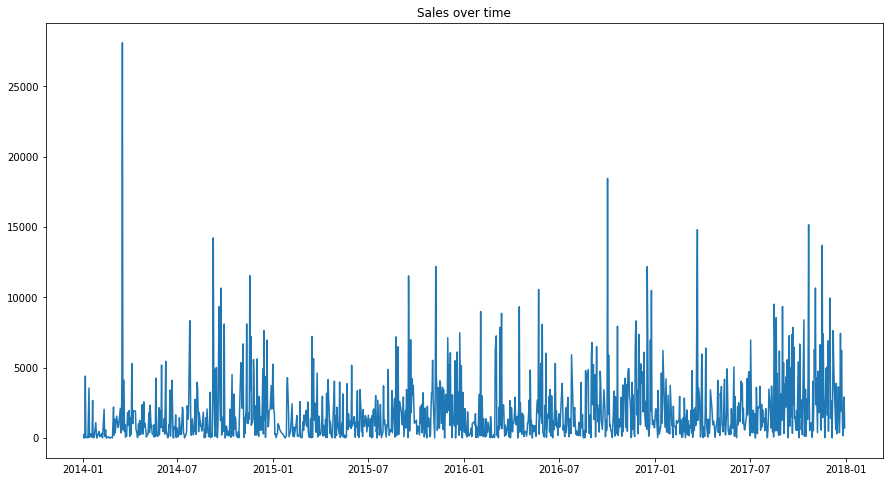

In [52]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
ax.plot(total_sales_per_day)
ax.set_title("Sales over time")
# plt.figure(figsize=(1000,8))
# plt.rcParams["figure.figsize"] = (50,10)
# plt.show()

# It is obvious that the second half of each year the trend is higher

In [53]:
# Annual scope
over_years = df.groupby(df.order_date.apply(lambda x : str(x)[:4]))

In [54]:
# Sales over years
sales_over_years = over_years.sales.sum()

In [55]:
sales_over_years

order_date
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: sales, dtype: float64

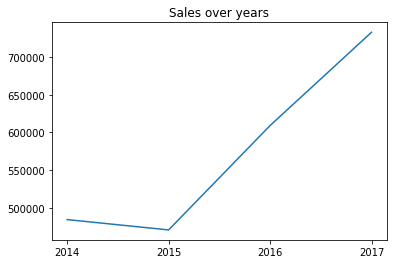

In [56]:
plt.plot(sales_over_years)
plt.title("Sales over years")
plt.show()

In [57]:
# Profit over years
profit_over_years = over_years.profit.sum()

In [58]:
profit_over_years

order_date
2014    49543.9741
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: profit, dtype: float64

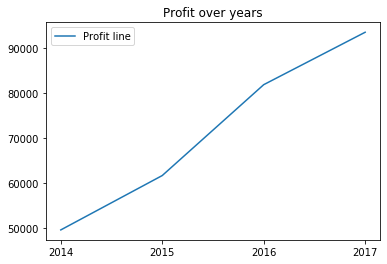

In [59]:
plt.plot(profit_over_years, label="Profit line")
plt.title("Profit over years")
plt.legend()
plt.show()

# total porfit line is ascending
##  Despite sales decline in 2015 profits got increased, why?

In [60]:
df_2014 = df.query('order_date < "2015-01-01"')

In [61]:
annual_discounts = over_years.discount.sum()

In [62]:
annual_discounts

order_date
2014    315.46
2015    327.09
2016    400.32
2017    518.22
Name: discount, dtype: float64

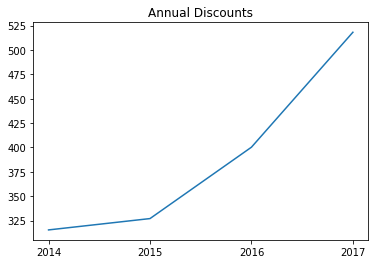

In [63]:
plt.plot(annual_discounts)
plt.title("Annual Discounts")
plt.show()

# Discounts has no effect on profit

In [64]:
# Try categories 2015
df_2015 = df.query('order_date > "2014-12-31" & order_date < "2016-01-01"')

In [65]:
df_2015.head()

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,duration,customer_id,customer_name,segment,...,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost,order_daterder
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,7 days,SO-20335,Sean O'Donnell,Consumer,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-76.6062,268.1217,2015-10-11
4,4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,7 days,SO-20335,Sean O'Donnell,Consumer,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,1.2582,9.9258,2015-10-11
14,14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,4 days,HP-14815,Harold Pawlan,Home Office,...,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,13.7620,-24.7716,38.5336,2015-11-22
15,15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,4 days,HP-14815,Harold Pawlan,Home Office,...,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,0.8480,-1.2720,2.1200,2015-11-22
24,24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,5 days,EB-13870,Emily Burns,Consumer,...,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649,348.2100,80.0883,268.1217,2015-09-25


In [66]:
categories_2015 = df_2015.groupby("category")
categories_2014 = df_2014.groupby("category")

In [67]:
categorical_sales_2015 = categories_2015['sales'].sum()
categorical_sales_2014 = categories_2014['sales'].sum()
categorical_sales_2015

category
Furniture          170518.237
Office Supplies    137233.463
Technology         162780.809
Name: sales, dtype: float64

In [68]:
categorical_sales_2014

category
Furniture          157192.8531
Office Supplies    151776.4120
Technology         175278.2330
Name: sales, dtype: float64

In [69]:
# 2014 Vs. 2015

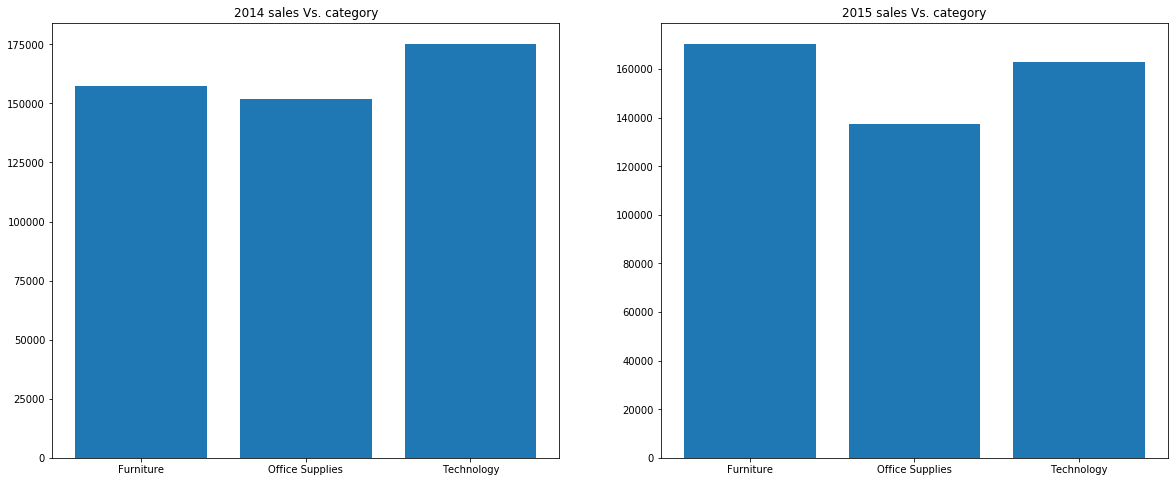

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1,figsize=(20,8))
ax1.bar(categorical_sales_2014.index, categorical_sales_2014.values)
ax1.set_title("2014 sales Vs. category")
ax2.bar(categorical_sales_2015.index, categorical_sales_2015.values)
ax2.set_title("2015 sales Vs. category")
plt.show()

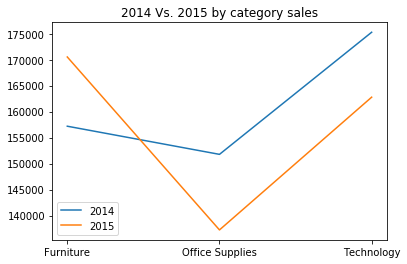

In [71]:
ax = plt.plot(categorical_sales_2014, label="2014")
plt.plot(categorical_sales_2015, label="2015")
plt.title("2014 Vs. 2015 by category sales")
plt.legend()
plt.show()

In [79]:
# per unit
categorical_units_sold_2014 = categories_2014["quantity"].sum()
categorical_units_sold_2015 = categories_2015["quantity"].sum()

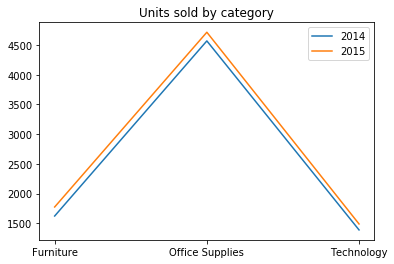

In [80]:
ax = plt.plot(categorical_units_sold_2014, label="2014")
plt.plot(categorical_units_sold_2015, label="2015")
plt.title("Units sold by category")
plt.legend()
plt.show()

In [72]:
categorical_profit_margin = df.groupby("category").profit.mean()
categorical_profit_margin

category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: profit, dtype: float64

## Despite lower total sales, more discount in 2015 compared to 2014
### 2015 achieved more profit due to the increase in number of units sold in each category

In [100]:
units_sold_df = pd.DataFrame([categorical_units_sold_2014, categorical_units_sold_2015], index=["year_2014","year_2015"])

In [102]:
units_sold_df

category,Furniture,Office Supplies,Technology
year_2014,1623,4569,1389
year_2015,1775,4715,1489


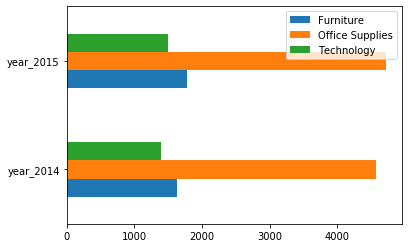

In [111]:
units_sold_df.plot(kind="barh")
plt.legend(loc="upper right")
plt.show()